In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
sns.set()

In [2]:
raw_data = pd.read_csv("FIFA19_cleaned(updated).csv")

In [3]:
data_w_corr = raw_data.copy()
data_w_corr = data_w_corr.drop(["Unnamed: 0"], axis=1)
data_w_corr.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,Spain,71,71,€750K,€6K,1906,Right,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,Spain,86,86,€21.5M,€21K,2058,Right,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,Turkey,79,79,€4M,€23K,2047,Left,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,Italy,70,70,€240K,€2K,1882,Right,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,Wales,66,66,€150K,€4K,1781,Left,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


In [4]:
pd.set_option("display.max_columns", None)
data_w_corr.describe(include="all")

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18140.000000,18140,18140.00000,18140,18140.000000,18140.000000,18140,18140,18140.000000,18140,18140.000000,18140.000000,18140.00000,18140,18140,18140,18140,18140,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,16116,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,16636
unique,NaN,17133,NaN,164,NaN,NaN,214,140,NaN,2,NaN,NaN,NaN,9,3,27,21,56,91,91,91,104,99,99,99,104,100,100,100,99,91,91,91,99,95,99,99,99,95,98,108,108,108,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1240
top,NaN,J. Rodríguez,NaN,England,NaN,NaN,€1.1M,€1K,NaN,Right,NaN,NaN,NaN,Medium/ Medium,Normal,ST,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,11,NaN,1656,NaN,NaN,431,4873,NaN,13935,NaN,NaN,NaN,9801,10588,2151,2880,1483,705,705,705,745,712,712,712,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,214300.719901,NaN,25.11957,NaN,66.246196,71.318137,NaN,NaN,1597.863892,NaN,1.112293,2.946913,2.36097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.732470,45.539305,52.298401,58.689967,42.902481,55.367806,47.166814,42.857056,52.715491,58.367089,64.608214,64.721665,63.495755,61.829879,63.958986,55.457387,65.090739,63.217585,65.316428,47.103418,55.876681,46.708159,49.952481,53.399063,48.539746,58.641014,47.292834,47.707442,45.672326,16.615160,16.391621,16.230871,16.387321,16.709702,NaN
std,29934.261774,NaN,4.66941,NaN,6.901041,6.123205,NaN,NaN,272.765529,NaN,0.389952,0.660273,0.75539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.358499,19.516318,17.379165,14.691747,17.685753,18.903739,18.386574,17.470519,15.321212,16.677419,14.924986,14.648898,14.763667,8.997568,14.132717,17.230724,11.821421,15.895280,12.551388,19.253798,17.367706,20.697375,19.520851,14.138923,15.698634,11.425500,19.900990,21.665017,21.288911,17.694292,16.903790,16.501965,17.032188,17.952905,NaN
min,16.000000,NaN,16.00000,NaN,46.000000,48.000000,NaN,NaN,731.000000,NaN,1.000000,1.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000

## Changing "Value" & "Wage" variables from string to float type

In [5]:
def money_converter(x, index_of_column_to_convert):
    """Creating function to change variable from string to float"""
    val=x.iloc[:,index_of_column_to_convert]
    remove_unit = []
    
    for i in range(val.shape[0]):
        remove_unit.append(val[i].strip("€"))
    
    remove_multiplier_K = []
    
    for i in range(len(remove_unit)):
        remove_multiplier_K.append(remove_unit[i].strip("K"))
    
    remove_multiplier_M = []
    
    for i in range(len(remove_multiplier_K)):
        remove_multiplier_M.append(remove_multiplier_K[i].strip("M"))
    
    val_conversion = np.asarray(remove_multiplier_M)
    val_conversion = val_conversion.astype(float)
    
    for i in range(len(val_conversion)):
        if remove_unit[i][-1]=="K":
            val_conversion[i]*=1000
        if remove_unit[i][-1]=="M":
            val_conversion[i]*=1000000
            
    return val_conversion

In [6]:
data_w_corr["Value"] = money_converter(data_w_corr,6)

In [7]:
data_w_corr["Wage"] = money_converter(data_w_corr,7)

## Changing "Height" variable from string to float

In [8]:
height = data_w_corr.iloc[:, 16]
height = height.tolist()

In [9]:
foot = []
inches = []

for i in height:
    foot.append(i[0])

foot_array = np.asarray(foot)
foot_float = foot_array.astype(float)

for x in height:
    inches.append(x[2:])

inches_array = np.asarray(inches)
inches_float = inches_array.astype(float)

print (foot_float)
print (inches_float)

[5. 5. 5. ... 6. 5. 6.]
[10.  7.  7. ...  0.  9.  4.]


In [10]:
height_in_metres = foot_float*0.3048 + inches_float*0.0254

height_in_metres = pd.DataFrame(height_in_metres)

height_in_metres.columns = ["Height in Metres"]

## Changing "Weight" variable from string to float

In [11]:
weight_in_pounds = data_w_corr.iloc[:, 17]
weight_in_pounds = weight_in_pounds.tolist()

In [12]:
weight = []

for i in weight_in_pounds:
    weight.append(i[0:3])
    
weight_array = np.asarray(weight)
weight_float = weight_array.astype(float)

weight_float

array([143., 150., 159., ..., 161., 143., 185.])

In [13]:
weight_in_kg = weight_float*0.453592
weight_in_kg = pd.DataFrame(weight_in_kg)
weight_in_kg.columns = ["Weight in KG"]

## Changing Positional Ratings variable from string to float

In [14]:
def rating_converter(data, index_of_column_to_convert):
    """Creating function to do conversion for all positional rating variables from string to float"""
    column_to_convert = data.iloc[:, index_of_column_to_convert]
    column_to_convert = column_to_convert.tolist()
    
    #For outfield players, GK rating would be NaN. Vice versa for GK players
    #As such, as mentioned in the cleaning of data, we will assign 0 to attributes with NaN
    column_to_convert_nan_is_zero = []

    for i in column_to_convert:
        if type(i) != str:
            column_to_convert_nan_is_zero.append("0")
        else:
            column_to_convert_nan_is_zero.append(i)
    
    first_2_digit = []
    last_digit = []
    
    for i in column_to_convert_nan_is_zero:
        first_2_digit.append(i[0:2])
        
    first_2_digit_array = np.asarray(first_2_digit)
    first_2_digit_float = first_2_digit_array.astype(float)
    
    for i in column_to_convert_nan_is_zero:
        last_digit.append(i[-1])
        
    last_digit_array = np.asarray(last_digit)
    last_digit_float = last_digit_array.astype(float)
    
    overall_rating = first_2_digit_float + last_digit_float
    
    return overall_rating

In [15]:
print(data_w_corr.columns)
print(data_w_corr.columns.get_loc('LS'))
print(data_w_corr.columns.get_loc('RB'))

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')
18
43


In [16]:
#Using for loop to implement the rating_converter function to the relevant columns

for i in range(18,44):
    data_w_corr.iloc[:, i] = rating_converter(data_w_corr, i)

In [17]:
data_w_corr.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,Spain,71,71,750000.0,6000.0,1906,Right,1.0,4.0,3.0,Medium/ Medium,Lean,RCM,5'10,143lbs,68.0,68.0,68.0,69.0,70.0,70.0,70.0,69.0,71.0,71.0,71.0,69.0,71.0,71.0,71.0,69.0,64.0,67.0,67.0,67.0,64.0,61.0,61.0,61.0,61.0,61.0,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,71.0,56.0,50.0,62.0,65.0,72.0,75.0,54.0,64.0,60.0,71.0,71.0,71.0,72.0,73.0,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,Spain,86,86,21500000.0,21000.0,2058,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,5'7,150lbs,77.0,77.0,77.0,85.0,84.0,84.0,84.0,85.0,88.0,88.0,88.0,85.0,86.0,86.0,86.0,85.0,74.0,76.0,76.0,76.0,74.0,71.0,66.0,66.0,66.0,71.0,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,Turkey,79,79,4000000.0,23000.0,2047,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,CM,5'7,159lbs,69.0,69.0,69.0,74.0,74.0,74.0,74.0,74.0,78.0,78.0,78.0,75.0,80.0,80.0,80.0,75.0,70.0,76.0,76.0,76.0,70.0,67.0,68.0,68.0,68.0,67.0,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,Italy,70,70,240000.0,2000.0,1882,Right,2.0,3.0,3.0,Low/ High,Normal,LCM,5'11,168lbs,65.0,65.0,65.0,66.0,66.0,66.0,66.0,66.0,67.0,67.0,67.0,66.0,68.0,68.0,68.0,66.0,70.0,71.0,71.0,71.0,70.0,69.0,71.0,71.0,71.0,69.0,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,67.0,65.0,62.0,69.0,67.0,63.0,71.0,69.0,74.0,67.0,65.0,75.0,70.0,61.0,65.0,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,Wales,66,66,150000.0,4000.0,1781,Left,1.0,3.0,2.0,Medium/ High,Stocky,CDM,5'6,154lbs,61.0,61.0,61.0,61.0,62.0,62.0,62.0,61.0,64.0,64.0,64.0,61.0,67.0,67.0,67.0,61.0,62.0,67.0,67.0,67.0,62.0,61.0,64.0,64.0,64.0,61.0,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,68.0,33.0,33.0,60.0,67.0,91.0,70.0,60.0,50.0,58.0,66.0,74.0,63.0,55.0,64.0,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K


## Assigning mean value to players with missing "Release Clause" variable

### Need convert to float first

In [18]:
# Changing all NaN values to "€0M" strings to allow previous functions to process

data_w_corr["Release Clause"] = data_w_corr["Release Clause"].fillna("€0M")

In [19]:
data_w_corr["Release Clause"] = money_converter(data_w_corr,-1)

In [20]:
# Replacing all "€0M" values with mean value for "Release Clause" variable

data_w_corr["Release Clause"] = data_w_corr["Release Clause"].replace(0, data_w_corr["Release Clause"].mean())

In [21]:
corr = data_w_corr.corr()
corr

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,1.000000,-0.739357,-0.416441,0.048908,-0.134834,-0.202627,-0.230662,-0.355190,-0.075242,-0.055434,-0.043716,-0.043716,-0.043716,-0.023221,-0.034262,-0.034262,-0.034262,-0.023221,-0.038320,-0.038320,-0.038320,-0.024130,-0.064375,-0.064375,-0.064375,-0.024130,-0.042501,-0.075255,-0.075255,-0.075255,-0.042501,-0.041341,-0.072495,-0.072495,-0.072495,-0.041341,-0.131491,-0.081216,-0.105968,-0.135652,-0.159129,-0.029598,-0.168975,-0.198944,-0.186371,-0.099252,0.134015,0.133223,-0.019272,-0.407674,0.048982,-0.165193,-0.168948,-0.053300,-0.259781,-0.160644,-0.228437,-0.161433,-0.087431,-0.214380,-0.139648,-0.383590,-0.110978,-0.086458,-0.069033,-0.105837,-0.111390,-0.106676,-0.118365,-0.105951,-0.118654
Age,-0.739357,1.000000,0.453597,-0.253356,0.074897,0.143339,0.236809,0.254976,0.059709,0.027369,0.045796,0.045796,0.045796,0.017104,0.029751,0.029751,0.029751,0.017104,0.032586,0.032586,0.032586,0.021291,0.068195,0.068195,0.068195,0.021291,0.060280,0.096564,0.096564,0.096564,0.060280,0.062742,0.103018,0.103018,0.103018,0.062742,0.130508,0.068277,0.146907,0.132894,0.142354,0.010058,0.143158,0.193270,0.181551,0.084699,-0.158839,-0.151790,-0.019643,0.453351,-0.090349,0.156607,0.177400,0.097601,0.333125,0.154861,0.265287,0.198294,0.082277,0.187275,0.139038,0.390925,0.143193,0.119901,0.103395,0.101363,0.106631,0.104978,0.116478,0.103389,0.058764
Overall,-0.416441,0.453597,1.000000,0.659746,0.634276,0.578746,0.606901,0.496841,0.211709,0.413311,0.335751,0.335751,0.335751,0.325785,0.337491,0.337491,0.337491,0.325785,0.341537,0.341537,0.341537,0.329778,0.365412,0.365412,0.365412,0.329778,0.320744,0.338251,0.338251,0.338251,0.320744,0.308044,0.297158,0.297158,0.297158,0.308044,0.394577,0.331782,0.340978,0.502211,0.390751,0.371926,0.418887,0.396281,0.483407,0.459729,0.196245,0.210141,0.264244,0.849546,0.102344,0.440751,0.264498,0.365747,0.350042,0.420201,0.396219,0.322590,0.355867,0.498001,0.341153,0.727050,0.287961,0.253803,0.223808,-0.026362,-0.025730,-0.029921,-0.018294,-0.023751,0.604898
Potential,0.048908,-0.253356,0.659746,1.000000,0.583001,0.491190,0.383628,0.369278,0.162013,0.352977,0.248776,0.248776,0.248776,0.257907,0.262882,0.262882,0.262882,0.257907,0.266290,0.266290,0.266290,0.257620,0.265807,0.265807,0.265807,0.257620,0.223545,0.222540,0.222540,0.222540,0.223545,0.211427,0.180843,0.180843,0.180843,0.211427,0.245572,0.242438,0.200730,0.368393,0.253946,0.314320,0.278997,0.229555,0.320363,0.353631,0.234162,0.236324,0.221654,0.511810,0.137625,0.287518,0.108649,0.202276,0.075370,0.265724,0.171192,0.155565,0.244639,0.346786,0.223794,0.438620,0.163717,0.144384,0.129589,-0.053833,-0.055366,-0.059580,-0.053197,-0.053796,0.569184
Value,-0.134834,0.074897,0.634276,0.583001,1.000000,0.851304,0.383634,0.645263,0.165070,0.316874,0.236254,0.236254,0.236254,0.236269,0.243810,0.243810,0.243810,0.236269,0.245018,0.245018,0.245018,0.234703,0.245898,0.245898,0.245898,0.234703,0.196677,0.199972,0.199972,0.199972,0.196677,0.183232,0.159384,0.159384,0.159384,0.183232,0.253050,0.257910,0.188612,0.333314,0.290767,0.275150,0.289865,0.267317,0.306681,0.312860,0.170316,0.172960,0.193999,0.545594,0.112708,0.285563,0.126979,0.214932,0.134134,0.282372,0.191925,0.148608,0.261513,0.361590,0.241705,0.454549,0.142431,0.115924,0.094142,-0.029937,-0.031052,-0.033249,-0.030429,-0.030357,0.970560
Wage,-0.202627,0.143339,0.578746,0.491190,0.851304,1.000000,0.353861,0.662269,0.140865,0.263484,0.210914,0.210914,0.210914,0.207

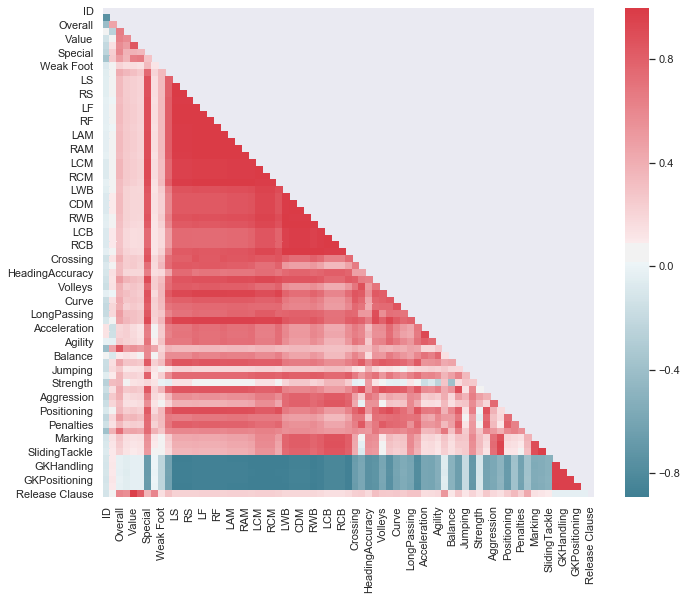

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Create custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, mask=mask)

In [23]:
correlated_features = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)
            
correlated_features = list(correlated_features)

correlated_features

['GKPositioning',
 'Wage',
 'RB',
 'Dribbling',
 'LDM',
 'Crossing',
 'CB',
 'LS',
 'RW',
 'RF',
 'CM',
 'LM',
 'LB',
 'Aggression',
 'LF',
 'GKReflexes',
 'LW',
 'LAM',
 'Reactions',
 'StandingTackle',
 'BallControl',
 'Volleys',
 'Positioning',
 'FKAccuracy',
 'Curve',
 'LCM',
 'GKHandling',
 'Interceptions',
 'RS',
 'HeadingAccuracy',
 'RAM',
 'LongPassing',
 'Agility',
 'RCM',
 'ShortPassing',
 'SprintSpeed',
 'RWB',
 'Penalties',
 'RCB',
 'RDM',
 'ShotPower',
 'CF',
 'LCB',
 'Marking',
 'Finishing',
 'CDM',
 'Release Clause',
 'CAM',
 'RM',
 'LWB',
 'LongShots',
 'Stamina',
 'SlidingTackle',
 'ST',
 'GKDiving',
 'GKKicking']

In [24]:
data = data_w_corr.drop(correlated_features, axis=1)

In [65]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Acceleration,Balance,Jumping,Strength,Vision,Composure
0,16,Luis García,37,Spain,71,71,750000.0,1906,1,1.0,4.0,3.0,Medium/ Medium,Lean,RCM,5'10,143lbs,56.0,72.0,54.0,60.0,73.0,79.0
1,41,Iniesta,34,Spain,86,86,21500000.0,2058,1,4.0,4.0,4.0,High/ Medium,Normal,LF,5'7,150lbs,70.0,84.0,47.0,58.0,93.0,89.0
2,80,E. Belözoğlu,37,Turkey,79,79,4000000.0,2047,0,2.0,4.0,4.0,Medium/ Medium,Stocky,CM,5'7,159lbs,54.0,81.0,72.0,65.0,86.0,80.0
3,164,G. Pinzi,37,Italy,70,70,240000.0,1882,1,2.0,3.0,3.0,Low/ High,Normal,LCM,5'11,168lbs,65.0,63.0,69.0,67.0,65.0,68.0
4,657,D. Vaughan,35,Wales,66,66,150000.0,1781,0,1.0,3.0,2.0,Medium/ High,Stocky,CDM,5'6,154lbs,33.0,91.0,60.0,58.0,64.0,82.0


## One Hot Encoding for "Nationality" variable

In [25]:
nat=data["Nationality"]
nat=np.asarray(nat)
nat = nat.reshape(-1,1)
nat.shape

(18140, 1)

In [26]:
nat_enc=OneHotEncoder().fit(nat)

In [27]:
nat_col_label = np.asarray(nat_enc.categories_)

nat_col_label = nat_col_label.flatten()

nat_col_label_list = nat_col_label.tolist()

# Converting to a very nice 1D list just to make the column name in the final dataframe to not have brackets. OCD :(

In [28]:
nat_enc_array=nat_enc.transform(nat).toarray()

In [29]:
nat_enc_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
nationality_enc = pd.DataFrame(nat_enc_array)

In [31]:
nationality_enc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
nationality_enc.columns = nat_col_label_list

In [33]:
nationality_enc.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Mapping "Preferred Foot" variable

In [34]:
# Right = 1
# Left = 0

data["Preferred Foot"] = data["Preferred Foot"].map({"Right":1, "Left":0})

In [35]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Acceleration,Balance,Jumping,Strength,Vision,Composure
0,16,Luis García,37,Spain,71,71,750000.0,1906,1,1.0,4.0,3.0,Medium/ Medium,Lean,RCM,5'10,143lbs,56.0,72.0,54.0,60.0,73.0,79.0
1,41,Iniesta,34,Spain,86,86,21500000.0,2058,1,4.0,4.0,4.0,High/ Medium,Normal,LF,5'7,150lbs,70.0,84.0,47.0,58.0,93.0,89.0
2,80,E. Belözoğlu,37,Turkey,79,79,4000000.0,2047,0,2.0,4.0,4.0,Medium/ Medium,Stocky,CM,5'7,159lbs,54.0,81.0,72.0,65.0,86.0,80.0
3,164,G. Pinzi,37,Italy,70,70,240000.0,1882,1,2.0,3.0,3.0,Low/ High,Normal,LCM,5'11,168lbs,65.0,63.0,69.0,67.0,65.0,68.0
4,657,D. Vaughan,35,Wales,66,66,150000.0,1781,0,1.0,3.0,2.0,Medium/ High,Stocky,CDM,5'6,154lbs,33.0,91.0,60.0,58.0,64.0,82.0


## Applying One Hot Encoding to "Work Rate" variable

In [36]:
data["Work Rate"].unique()

array(['Medium/ Medium', 'High/ Medium', 'Low/ High', 'Medium/ High',
       'Low/ Medium', 'High/ Low', 'High/ High', 'Medium/ Low',
       'Low/ Low'], dtype=object)

Work Rate is split into 2 parts, first is Attacking Work Rate, followed by Defensive Work Rate.

This is the initial idea of encoding: "As such we will need to split it into 2 columns before applying One Hot Encoding to both of it"

However, I realized by permutation that even if the 2 parts are combined, there can only be a total of 9 different permutations (as shown in the line of code above). As such we till just implement one hot encoding as tho there were 9 different variables.

In [37]:
wr = data["Work Rate"]
wr = np.asarray(wr)
wr = wr.reshape(-1,1)
wr.shape

(18140, 1)

In [38]:
wr_enc = OneHotEncoder().fit(wr)

In [39]:
wr_col_label = np.asarray(wr_enc.categories_)

wr_col_label = wr_col_label.flatten()

wr_col_label_list = wr_col_label.tolist()

# Converting to a very nice 1D list just to make the column name in the final dataframe to not be between brackets. OCD :(

In [40]:
wr_enc_array = wr_enc.transform(wr).toarray()

wr_encoded = pd.DataFrame(wr_enc_array)

In [41]:
wr_encoded.columns = wr_col_label_list

In [42]:
wr_encoded.head()

,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying One Hot Encoding to "Body Type" variable

In [43]:
bt = data["Body Type"]
bt = np.asarray(bt)
bt = bt.reshape(-1,1)
bt.shape

(18140, 1)

In [44]:
bt_enc = OneHotEncoder().fit(bt)

In [45]:
bt_col_label = np.asarray(bt_enc.categories_)

bt_col_label = bt_col_label.flatten()

bt_col_label_list = bt_col_label.tolist()

# Converting to a very nice 1D list just to make the column name in the final dataframe to not be between brackets. OCD :(

In [46]:
bt_enc_array = bt_enc.transform(bt).toarray()

bt_encoded = pd.DataFrame(bt_enc_array)

In [47]:
bt_encoded.columns = bt_col_label_list

In [48]:
bt_encoded.head()

,Lean,Normal,Stocky
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


## Applying One Hot Encoding to "Position" variable

In [49]:
pos = data["Position"]
pos = np.asarray(pos)
pos = pos.reshape(-1,1)
pos.shape

(18140, 1)

In [50]:
len(data["Position"].unique())

27

In [51]:
pos_enc = OneHotEncoder().fit(pos)

In [52]:
pos_col_label = np.asarray(pos_enc.categories_)

pos_col_label = pos_col_label.flatten()

pos_col_label_list = pos_col_label.tolist()

# Converting to a very nice 1D list just to make the column name in the final dataframe to not be between brackets. OCD :(

In [53]:
pos_enc_array = pos_enc.transform(pos).toarray()

pos_encoded = pd.DataFrame(pos_enc_array)

In [54]:
pos_encoded.columns = pos_col_label_list

In [55]:
pos_encoded.head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Combining all preprocessed data

In [56]:
data_preprocessed = data.copy()

frames = [data_preprocessed, nationality_enc, wr_encoded, bt_encoded, pos_encoded, height_in_metres, weight_in_kg]

In [57]:
data_preprocessed = pd.concat(frames, axis=1)

data_preprocessed.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Acceleration,Balance,Jumping,Strength,Vision,Composure,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium,Lean,Normal,Stocky,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Height in Metres,Weight in KG
0,16,Luis García,37,Spain,71,71,750000.0,1906,1,1.0,4.0,3.0,Medium/ Medium,Lean,RCM,5'10,143lbs,56.0,72.0,54.0,60.0,73.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7780,64.863656
1,41,Iniesta,34,Spain,86,86,21500000.0,2058,1,4.0,4.0,4.0,High/ Medium,Normal,LF,5'7,150lbs,70.0,84.0,47.0,58.0,93.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7018,68.038800
2,80,E. Belözoğlu,37,Turkey,79,79,4000000.0,2047,0,2.0,4.0,4.0,Medium/ Medium,Stocky,CM,5'7,159lbs,54.0,81.0,72.0,

## Dropping repeated data (i.e. data that has been encoded, etc)

In [58]:
data_preprocessed = data_preprocessed.drop(["Name", "Nationality", "Work Rate", "Body Type", "Position", "Height", "Weight"], axis=1)

In [59]:
# Rearranging list of columns to put target variable "Potential" at the end

cols = data_preprocessed.columns.tolist()
cols

['ID',
 'Age',
 'Overall',
 'Potential',
 'Value',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Acceleration',
 'Balance',
 'Jumping',
 'Strength',
 'Vision',
 'Composure',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China PR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'FYR Macedonia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 '

In [60]:
target = cols.pop(3)
cols.append(target)
cols

['ID',
 'Age',
 'Overall',
 'Value',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Acceleration',
 'Balance',
 'Jumping',
 'Strength',
 'Vision',
 'Composure',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China PR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'FYR Macedonia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ge

In [61]:
# Shifting the target "Potential" variable to the end of the dataframe

data_preprocessed = data_preprocessed[cols]

In [62]:
data_preprocessed.head()

,ID,Age,Overall,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Acceleration,Balance,Jumping,Strength,Vision,Composure,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium,Lean,Normal,Stocky,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Height in Metres,Weight in KG,Potential
0,16,37,71,750000.0,1906,1,1.0,4.0,3.0,56.0,72.0,54.0,60.0,73.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7780,64.863656,71
1,41,34,86,21500000.0,2058,1,4.0,4.0,4.0,70.0,84.0,47.0,58.0,93.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7018,68.038800,86
2,80,37,79,4000000.0,2047,0,2.0,4.0,4.0,54.0,81.0,72.0,65.0,86.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

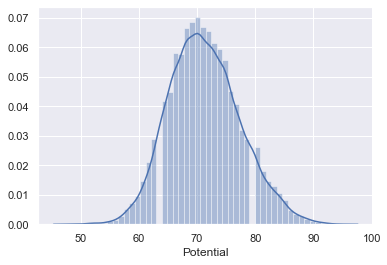

In [63]:
sns.distplot(data_preprocessed["Potential"])

# Now let's save it as another CSV before breaking it down to Training, Validation & Test data sets in another set of code

In [64]:
export = data_preprocessed.to_csv(r"C:\Users\Solomon\Python Projects\Solo's Projects\FIFA19\FIFA19_preprocessed(updated).csv")